In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tushare as ts


In [2]:
ts.set_token('b312332954cc4646e7fde98b06f1dac2453802f388ded2ac67348e91')
pro = ts.pro_api() 

In [16]:
df = ts.pro_bar(ts_code='300503.SZ', adj='qfq', start_date='20220429', end_date='20220622')

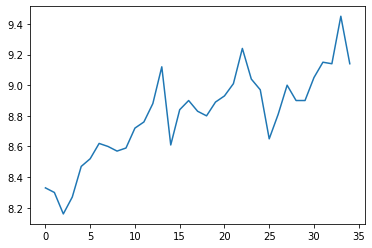

In [17]:
prices=df['close'].values[::-1]
plt.plot(prices)
# plt.savefig('./FIG/'+str([item for item in prices])+'.png')
plt.show()

In [22]:
judge1(conv(prices))
diff=[(prices[i]-prices[i-1])/prices[i-1]*100 for i in range(1,len(prices))]
print(judge2(diff))

False


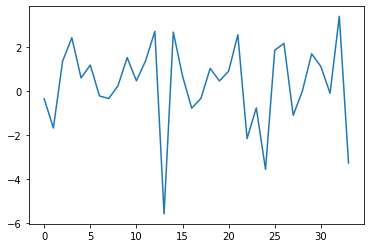

In [25]:
plt.plot(diff)
# plt.savefig('./FIG/'+str([item for item in prices])+'.png')
plt.show()

In [5]:
intervals=[13,17,21,25,29]
amount_th=1.5
amount_day=10

In [28]:
result=pd.DataFrame()
for file in os.listdir('DATA'):
    code=str(file)
    if(code[0]=='.'):
        continue
    print(code)
    df=pd.read_csv('./DATA/'+code,index_col=0)
    for index,row in df.iterrows():
        for interval in intervals: 
            if(index+interval+1>len(df) or index+20>len(df)):
                 break
            prices=df.iloc[index+1:index+interval+1]['Close'].values[::-1]
            diff=[(prices[i]-prices[i-1])/prices[i-1]*100 for i in range(1,len(prices))]
#           前期强势 完成震荡
            flag_1=judge1(prices) and judge2(diff)
#           价升
            flag_2=row['Close']>prices[-1]
#           量升
            flag_3=row['Amount']> df.iloc[index+1:index+amount_day+1]['Amount'].values.mean()*amount_th
#           多头排列
            MA_5=df.iloc[index:index+5]['Close'].mean()
            MA_10=df.iloc[index:index+10]['Close'].mean()
            MA_15=df.iloc[index:index+20]['Close'].mean()
            flag_4=MA_5>MA_10 and MA_10>MA_15
#             print(flag_1,flag_2,flag_3,flag_4)
            if(flag_1 and flag_2 and flag_3 and flag_4):
#                  print(row)
                 result=result.append(row,ignore_index=True)
    print(result)

000001.SZ.csv
        Amount    Close       Code        Date  MainForce  MainForceRatio  \
0  236314.5902  24.6000  000001.SZ  20210525.0   17699.20        0.074897   
1  229971.8224  10.6176  000001.SZ  20190125.0   60120.84        0.261427   

   North       PE  profit_yoy  rev_yoy  
0  11.33  16.5025       18.53    10.18  
1   3.27   8.1450        6.80     8.56  
000002.SZ.csv
        Amount    Close       Code        Date  MainForce  MainForceRatio  \
0  236314.5902  24.6000  000001.SZ  20210525.0   17699.20        0.074897   
1  229971.8224  10.6176  000001.SZ  20190125.0   60120.84        0.261427   
2  381721.4051  29.0898  000002.SZ  20201118.0   35205.52        0.092228   
3  468340.7502  27.7091  000002.SZ  20200918.0   66106.41        0.141150   
4  162881.8510  24.9415  000002.SZ  20190620.0   18196.38        0.111715   

   North       PE  profit_yoy  rev_yoy  
0  11.33  16.5025       18.53    10.18  
1   3.27   8.1450        6.80     8.56  
2   6.35   9.1933        8.89  

KeyboardInterrupt: 

In [66]:
prices=[16.33, 16.22, 16.52, 16.85, 16.39, 16.83, 16.86, 16.99, 17.1, 16.58, 16.28, 16.41, 16.77]
diff=[(prices[i]-prices[i-1])/prices[i-1]*100 for i in range(1,len(prices))]
print(diff)

[-0.6736068585425563, 1.8495684340320637, 1.9975786924939578, -2.7299703264095005, 2.6845637583892477, 0.1782531194295968, 0.7710557532621531, 0.6474396703943672, -3.040935672514638, -1.8094089264173534, 0.7985257985257923, 2.193784277879338]


In [8]:
def conv(prices):
    assert len(prices)%2!=0
    while(len(prices)>3):
        prices=[(prices[i]+prices[i+1]+prices[i+2])/3 for i in range(len(prices)-2)]
    return prices

def judge1(prices):
    prices=conv(prices)
    assert len(prices)==3
#   中间必须高于前半段
    return prices[1]>prices[0]

def judge2(diff):
    assert len(diff)%2==0
    n=int (len(diff)/2)
    a,b=sum(diff[:n]),sum(diff[n:])


    return min(diff[:n]) >-2 and a>b and a>0 and b<1 and max(diff[n:]) < 2 and abs(a)>abs(b)+2
# judge1(conv(prices))
# judge2(diff)

In [48]:
judge1(conv(prices))

True

In [49]:
print(conv(prices))

[3.8888888888888893, 4.481481481481482, 4.518518518518518]


In [50]:
 judge2(diff)

True